## Multi-Class Classification

take clustered data, classify

In [2]:
# check installed version
import pycaret
import pandas as pd
pycaret.__version__

'3.0.4'

In [3]:
clustered = pd.read_csv('clustered/clustered_kmeans _2023-08-14 09:31:34.csv')
clustered

,Unnamed: 0,group,time,s_MP,change,type,length,sum_change,s_area,surge_area,...,p_type,p_MP,p_buyCap,p_askCap,p_totalBidVol,p_totalAskVol,p_length,p_sum_change,p_area,Cluster
0,0,1,1.660222e+12,29.99,0.317588,surge,1,0.317588,0.317588,0.317588,...,precursor,30.00,7349599.5,1.229796e+09,716681.94,314676.40,6.0,-0.004943,-0.029656,Cluster 2
1,1,3,1.660222e+12,29.85,0.000469,surge,1,0.000469,0.000469,0.000469,...,precursor,29.90,7307990.0,1.229792e+09,715352.90,314642.84,1.0,0.000402,0.000402,Cluster 2
2,2,5,1.660222e+12,29.87,0.001105,surge,2,0.001607,0.003214,0.003214,...,precursor,29.92,7285245.0,1.229754e+09,714476.10,313576.00,4.0,-0.002773,-0.011090,Cluster 2
3,3,7,1.660222e+12,29.89,0.001610,surge,1,0.001610,0.001610,0.001610,...,precursor,29.88,7318707.0,1.229744e+09,715730.56,313546.60,2.0,-0.000200,-0.000400,Cluster 2
4,4,9,1.660223e+12,29.90,0.001372,surge,1,0.001372,0.001372,0.001372,...,precursor,29.93,7280582.0,1.229794e+09,714140.10,314889.38,7.0,-0.013670,-0.095690,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566,5566,11133,1.691438e+12,12.43,0.000805,surge,3,0.002010,0.006031,0.006031,...,precursor,12.45,1230808.2,1.275139e+07,305097.16,250228.95,8.0,-0.002408,-0.019265,Cluster 3
5567,5567,11135,1.691441e+12,12.43,0.001530,surge,1,0.001530,0.001530,0.001530,...,precursor,12.45,1239702.0,1.274492e+07,305865.50,249742.61,1.0,-0.000401,-0.000401,Cluster 3
5568,5568,11137,1.691442e+12,12.44,0.000564,surge,1,0.000564,0.000564,0.000564,...,precursor,12.43,1210140.5,1.275866e+07,303521.28,250877.56,2.0,-0.002653,-0.005306,Cluster 3
5569,5569,11139,1.691443e+12,12.41,0.002981,surge,1,0.002981,0.002981,0.002981,...,precursor,12.46,1227623.8,1.274296e+07,304847.25,249542.22,1.0,-0.000720,-0.000720,Cluster 3


In [4]:
clustered.drop(['group', 'time', 's_MP', 'change', 'type', 'length', 'sum_change', 's_area', 'surge_area' ] , axis=1, inplace=True) 
clustered

,Unnamed: 0,p_group,p_time,p_change,p_type,p_MP,p_buyCap,p_askCap,p_totalBidVol,p_totalAskVol,p_length,p_sum_change,p_area,Cluster
0,0,2.0,1.660222e+12,-0.000467,precursor,30.00,7349599.5,1.229796e+09,716681.94,314676.40,6.0,-0.004943,-0.029656,Cluster 2
1,1,4.0,1.660222e+12,0.000402,precursor,29.90,7307990.0,1.229792e+09,715352.90,314642.84,1.0,0.000402,0.000402,Cluster 2
2,2,6.0,1.660222e+12,-0.000066,precursor,29.92,7285245.0,1.229754e+09,714476.10,313576.00,4.0,-0.002773,-0.011090,Cluster 2
3,3,8.0,1.660222e+12,-0.000435,precursor,29.88,7318707.0,1.229744e+09,715730.56,313546.60,2.0,-0.000200,-0.000400,Cluster 2
4,4,10.0,1.660223e+12,-0.000534,precursor,29.93,7280582.0,1.229794e+09,714140.10,314889.38,7.0,-0.013670,-0.095690,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566,5566,11134.0,1.691438e+12,-0.000321,precursor,12.45,1230808.2,1.275139e+07,305097.16,250228.95,8.0,-0.002408,-0.019265,Cluster 3
5567,5567,11136.0,1.691441e+12,-0.000401,precursor,12.45,1239702.0,1.274492e+07,305865.50,249742.61,1.0,-0.000401,-0.000401,Cluster 3
5568,5568,11138.0,1.691442e+12,-0.001848,precursor,12.43,1210140.5,1.275866e+07,303521.28,250877.56,2.0,-0.002653,-0.005306,Cluster 3
5569,5569,11140.0,1.691444e+12,-0.000720,precursor,12.46,1227623.8,1.274296e+07,304847.25,249542.22,1.0,-0.000720,-0.000720,Cluster 3


In [5]:
#setup 
from pycaret.classification import *
s = setup(clustered, target = 'Cluster', session_id = 42)

,Description,Value
0,Session id,42
1,Target,Cluster
2,Target type,Multiclass
3,Target mapping,"Cluster 0: 0, Cluster 1: 1, Cluster 2: 2, Cluster 3: 3"
4,Original data shape,"(5571, 14)"
5,Transformed data shape,"(5571, 14)"
6,Transformed train set shape,"(3899, 14)"
7,Transformed test set shape,"(1672, 14)"
8,Numeric features,12
9,Categorical features,1


In [20]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [21]:
type(exp)


pycaret.classification.oop.ClassificationExperiment

In [22]:
exp.setup(clustered, target = 'Cluster', session_id = 42)


,Description,Value
0,Session id,42
1,Target,Cluster
2,Target type,Multiclass
3,Target mapping,"Cluster 0: 0, Cluster 1: 1, Cluster 2: 2, Cluster 3: 3"
4,Original data shape,"(5571, 14)"
5,Transformed data shape,"(5571, 14)"
6,Transformed train set shape,"(3899, 14)"
7,Transformed test set shape,"(1672, 14)"
8,Numeric features,12
9,Categorical features,1


In [23]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9995,0.9998,0.9995,0.9995,0.9995,0.9993,0.9993,0.1460
rf,Random Forest Classifier,0.9992,1.0000,0.9992,0.9992,0.9992,0.9990,0.9990,0.4370
et,Extra Trees Classifier,0.9992,1.0000,0.9992,0.9992,0.9992,0.9990,0.9990,0.4070
dt,Decision Tree Classifier,0.9990,0.9993,0.9990,0.9990,0.9990,0.9986,0.9986,0.1030
gbc,Gradient Boosting Classifier,0.9990,0.9994,0.9990,0.9990,0.9990,0.9986,0.9986,2.0550
lightgbm,Light Gradient Boosting Machine,0.9985,0.9999,0.9985,0.9985,0.9985,0.9979,0.9979,535.5560
nb,Naive Bayes,0.9754,0.9991,0.9754,0.9771,0.9755,0.9670,0.9675,0.1010
lda,Linear Discriminant Analysis,0.9513,0.9981,0.9513,0.9536,0.9515,0.9346,0.9352,0.1060
ridge,Ridge Classifier,0.9384,0.0000,0.9384,0.9423,0.9391,0.9175,0.9184,0.0950
ada,Ada Boost Classifier,0.7474,0.9044,0.7474,0.6152,0.6607,0.6587,0.7243,0.3310


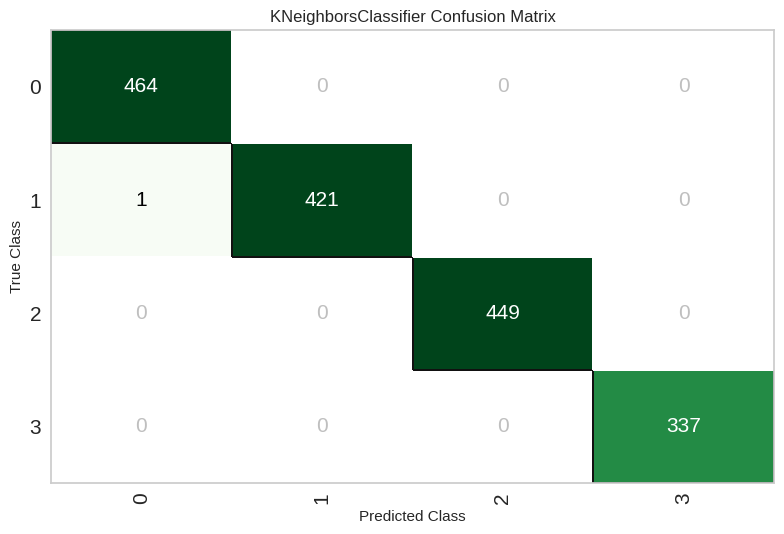

In [24]:
plot_model(best, plot = 'confusion_matrix')

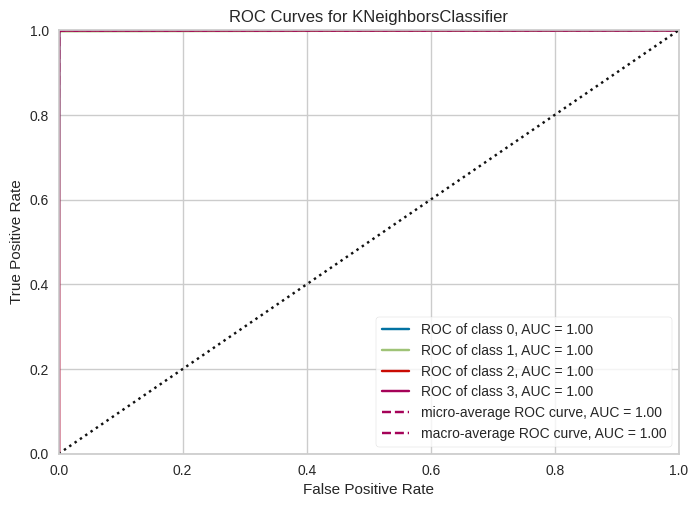

In [25]:
plot_model(best, plot = 'auc')


In [15]:
# plot_model(best, plot = 'efficiency')
# # 

In [26]:
evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [27]:
holdout_pred = predict_model(best)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9994,0.9996,0.9994,0.9994,0.9994,0.9992,0.9992


In [28]:
holdout_pred.head()


,Unnamed: 0,p_group,p_time,p_change,p_type,p_MP,p_buyCap,p_askCap,p_totalBidVol,p_totalAskVol,p_length,p_sum_change,p_area,Cluster,prediction_label,prediction_score
4954,4954,9910.0,1.687970e+12,-0.004686,precursor,12.770000,1406650.375,1.230255e+07,320883.59375,326178.718750,4.0,-0.018384,-0.073536,3,Cluster 3,1.0
2131,2131,4264.0,1.671043e+12,-0.000283,precursor,14.110000,5572677.000,1.131250e+07,716330.37500,222041.468750,4.0,-0.033790,-0.135161,0,Cluster 0,1.0
5260,5260,10522.0,1.689705e+12,-0.000286,precursor,14.000000,1476289.625,1.232563e+07,354022.71875,261870.234375,5.0,-0.001143,-0.005715,3,Cluster 3,1.0
1373,1373,2748.0,1.667287e+12,-0.000615,precursor,19.440001,4734718.500,2.209819e+09,613449.43750,241535.093750,2.0,-0.003238,-0.006476,2,Cluster 2,1.0
3417,3417,6836.0,1.678079e+12,-0.005420,precursor,15.980000,3407809.750,3.411899e+07,443226.90625,326164.000000,1.0,-0.005420,-0.005420,1,Cluster 1,1.0


### loading a model

In [ ]:
# check installed version
import pycaret
import pandas as pd
pycaret.__version__

In [6]:
# functional API
# loaded_model = load_model('iforest_pipeline')
# print(loaded_model)

# OOP API
loaded_model = s.load_model('kmeans_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['group', 'time', 's_MP', 'change',
                                             'length', 'sum_change', 's_area',
                                             'surge_area', 'p_group', 'p_time',
                                             'p_change', 'p_MP', 'p_buyCap',
                                             'p_askCap', 'p_totalBidVol',
                                             'p_totalAskVol', 'p_length',
                                             'p_sum_change', 'p_area'],
                                    transformer=SimpleImputer(add_...
                 TransformerWrapper(exclude=None, include=['type', 'p_type'],
                                    transformer=OneHotEncoder(cols=['type',
                                                